TEJASWINI SHARMA

Data Science & Business Analytics Intern @ The Sparks Foundation (GRIP)

Task 2 - Prediction Using Unsupervised ML - Iris

### Importing Required Libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

### Importing the dataset

In [99]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
# renaming the column

df.rename(columns={'SepalLengthCm':'sepal length (cm)'},inplace= True)
df.rename(columns={'SepalWidthCm':'sepal width (cm)'},inplace= True)
df.rename(columns={'PetalLengthCm':'petal length (cm)'},inplace= True)
df.rename(columns={'PetalWidthCm':'petal width (cm)'},inplace= True)
df.rename(columns={'Species':'species'},inplace= True)

In [101]:
df

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [102]:
df.shape

(150, 6)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Visualization of the data

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

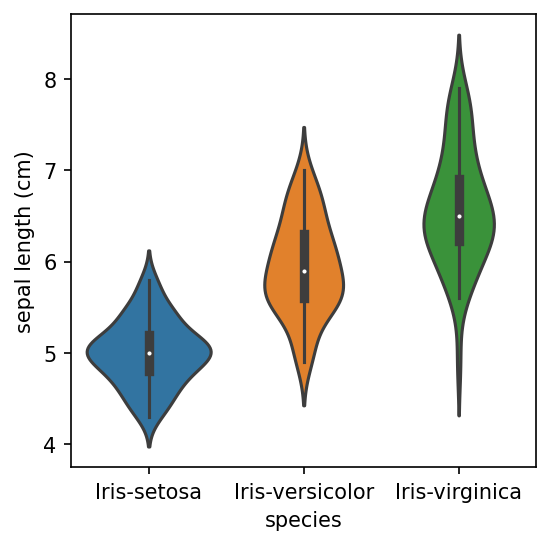

In [104]:
plt.subplots(figsize=(4,4),dpi=150)
sns.violinplot(x='species',y='sepal length (cm)',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

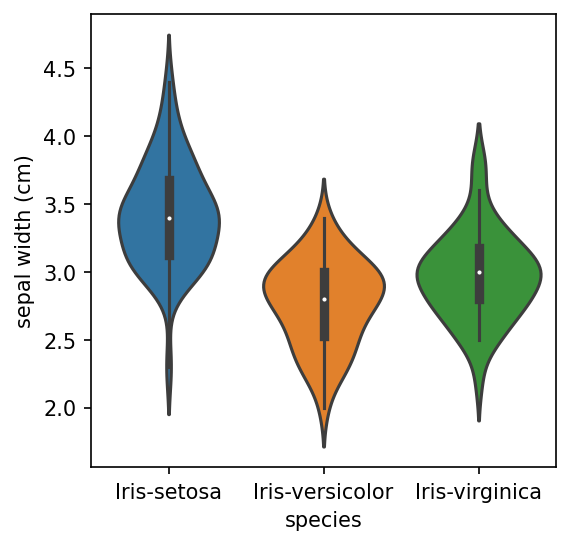

In [105]:
plt.subplots(figsize=(4,4),dpi=150)
sns.violinplot(x='species',y='sepal width (cm)',data=df)

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

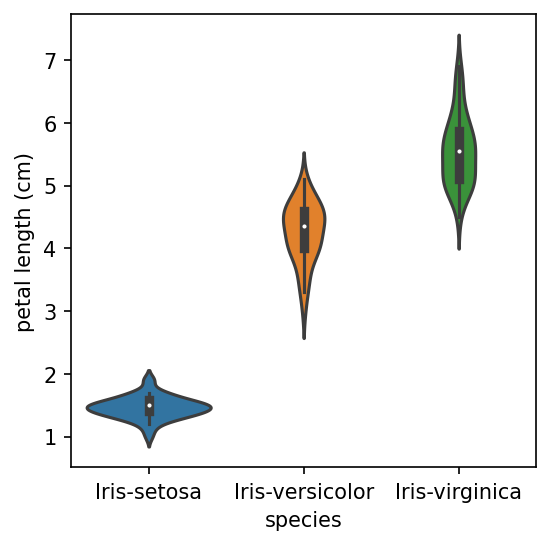

In [106]:
plt.subplots(figsize=(4,4),dpi=150)
sns.violinplot(x='species',y='petal length (cm)',data=df)

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

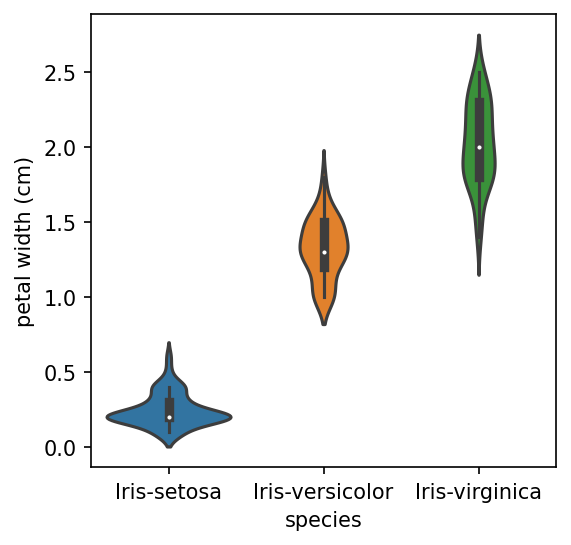

In [107]:
plt.subplots(figsize=(4,4),dpi=150)
sns.violinplot(x='species',y='petal width (cm)',data=df)

### Data Preperation 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [109]:
# dropping the Id column
df.drop(columns='Id', inplace= True)

# dropping the Species column
df.drop(columns='species', inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Model Training Using K-Means

In [111]:
from sklearn.cluster import KMeans

In [112]:
wcss=[] #within cluster sum of squares



# finding the optimum number of clusters for Kmeans Classification

x = df.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

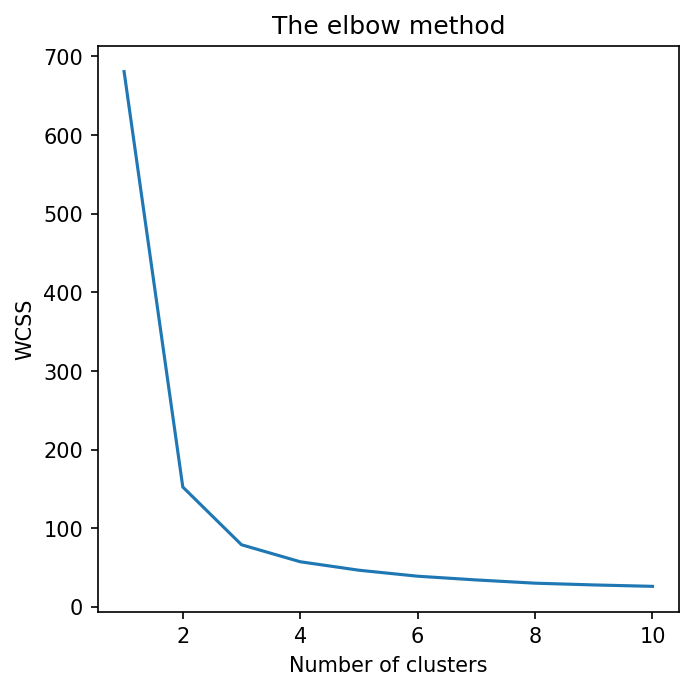

In [113]:
# Plotting the results onto a line graph,`allowing us to observe 'The elbow'


plt.figure(figsize=(5,5),dpi=150)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration

From this we choose the number of clusters as 3.


In [114]:
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans.fit(x)
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[6.56818182 3.08636364 5.53636364 2.16363636]
 [4.69       3.085      1.385      0.19      ]
 [5.62857143 2.72380952 4.13333333 1.2952381 ]
 [6.44210526 2.97894737 4.59473684 1.43157895]
 [5.52857143 4.04285714 1.47142857 0.28571429]
 [6.03684211 2.70526316 5.         1.77894737]
 [7.6        3.73333333 6.4        2.23333333]
 [7.43333333 2.92222222 6.26666667 1.98888889]
 [5.12173913 3.5173913  1.53043478 0.27826087]
 [5.24285714 2.37142857 3.44285714 1.02857143]]


In [115]:
# Applying kmeans to the dataset / Creating the kmeans classifier


kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the Kmeans Results 

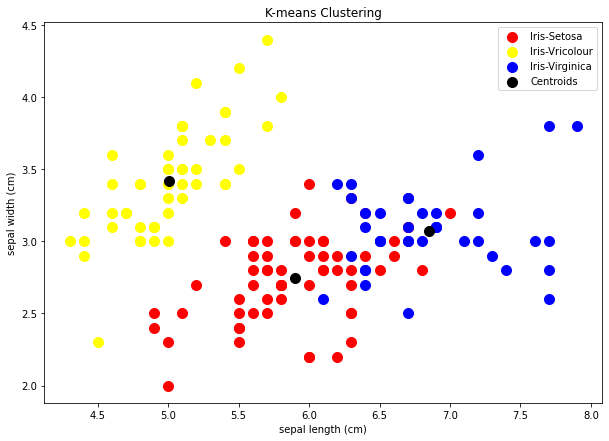

In [116]:
# Visualising the clusters - On the first two features (Sepal Length vs Sepal Width)


plt.figure(figsize=(10,7))



plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-Vricolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-Virginica')


# Plotting the centroids of the clusters


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')



plt.title('K-means Clustering')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

### Result

    The Iris Data Set Consists of 3 Clusters with labels:
    1.Iris Setosa 
    2.Iris Versicolour 
    3.Iris Virginica